In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasoonkottarathil/btcinusd")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Luiz\.cache\kagglehub\datasets\prasoonkottarathil\btcinusd\versions\4


In [2]:
import pandas as pd

In [3]:
df_2020 = pd.read_csv(f"{path}/BTC-2020min.csv")
df_2021 = pd.read_csv(f"{path}/BTC-2021min.csv")

df_combined = pd.concat([df_2020, df_2021])

In [4]:
# Criar dfs
df_combined_min = df_combined.copy()

df_combined_daily = df_combined.copy()


In [5]:
print(df_combined_daily.head(2))

         unix                 date   symbol      open      high       low  \
0  1609459140  2020-12-31 23:59:00  BTC/USD  28982.44  29024.59  28969.83   
1  1609459080  2020-12-31 23:58:00  BTC/USD  29044.79  29048.62  29000.12   

      close  Volume BTC     Volume USD  
0  28992.79    5.897679  170990.182941  
1  29000.12   20.362289  590508.837815  


### EDA

In [6]:
# Converter a coluna 'date' para datetime
df_combined_min['date'] = pd.to_datetime(df_combined_min['date'], errors='coerce')
df_combined_daily['date'] = pd.to_datetime(df_combined_daily['date'], errors='coerce')

# Converter a coluna 'unix' para datetime (assumindo que os valores estão em segundos)
df_combined_min['unix_date'] = pd.to_datetime(df_combined_min['unix'], unit='s', errors='coerce')
df_combined_daily['unix_date'] = pd.to_datetime(df_combined_daily['unix'], unit='s', errors='coerce')

In [7]:
# Remover duplicatas, se houver
df_combined_min.drop_duplicates(inplace=True)
df_combined_daily.drop_duplicates(inplace=True)

In [8]:
# Extração de features a partir da data
df_combined_min['ano'] = df_combined_min['date'].dt.year
df_combined_min['mes'] = df_combined_min['date'].dt.month
df_combined_min['dia']   = df_combined_min['date'].dt.day
df_combined_min['dia_semana'] = df_combined_min['date'].dt.dayofweek

# ----
df_combined_daily['ano'] = df_combined_daily['date'].dt.year
df_combined_daily['mes'] = df_combined_daily['date'].dt.month
df_combined_daily['dia']   = df_combined_daily['date'].dt.day
df_combined_daily['dia_semana'] = df_combined_daily['date'].dt.dayofweek


In [9]:
# Renomear colunas (opcional)
df_combined_min.rename(columns={'Volume BTC': 'volume_btc', 'Volume USD': 'volume_usd'}, inplace=True)
df_combined_daily.rename(columns={'Volume BTC': 'volume_btc', 'Volume USD': 'volume_usd'}, inplace=True)

In [10]:
print(df_combined_daily.head(2))

         unix                date   symbol      open      high       low  \
0  1609459140 2020-12-31 23:59:00  BTC/USD  28982.44  29024.59  28969.83   
1  1609459080 2020-12-31 23:58:00  BTC/USD  29044.79  29048.62  29000.12   

      close  volume_btc     volume_usd           unix_date   ano  mes  dia  \
0  28992.79    5.897679  170990.182941 2020-12-31 23:59:00  2020   12   31   
1  29000.12   20.362289  590508.837815 2020-12-31 23:58:00  2020   12   31   

   dia_semana  
0           3  
1           3  


# Exploração por minuto

In [11]:
# 1. Calcular o retorno diário
df_combined_min['daily_return'] = (df_combined_min['close'] - df_combined_min['open']) / df_combined_min['open']
# 2. Criar uma coluna booleana para indicar se o fechamento foi "verde"
df_combined_min['green'] = df_combined_min['daily_return'] > 0
# 3. Criar uma coluna com o nome do dia da semana (em inglês)
df_combined_min['dia_da_semana'] = df_combined_min['date'].dt.day_name()

In [12]:
df_combined_min.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098504 entries, 0 to 610781
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   unix           1098504 non-null  int64         
 1   date           1098504 non-null  datetime64[ns]
 2   symbol         1098504 non-null  object        
 3   open           1098504 non-null  float64       
 4   high           1098504 non-null  float64       
 5   low            1098504 non-null  float64       
 6   close          1098504 non-null  float64       
 7   volume_btc     1098504 non-null  float64       
 8   volume_usd     1098504 non-null  float64       
 9   unix_date      1098504 non-null  datetime64[ns]
 10  ano            1098504 non-null  int32         
 11  mes            1098504 non-null  int32         
 12  dia            1098504 non-null  int32         
 13  dia_semana     1098504 non-null  int32         
 14  daily_return   1098504 non-null  float64

In [13]:
df_combined_min.head(30)

,unix,date,symbol,open,high,low,close,volume_btc,volume_usd,unix_date,ano,mes,dia,dia_semana,daily_return,green,dia_da_semana
0,1609459140,2020-12-31 23:59:00,BTC/USD,28982.44,29024.59,28969.83,28992.79,5.897679,170990.182941,2020-12-31 23:59:00,2020,12,31,3,0.000357,True,Thursday
1,1609459080,2020-12-31 23:58:00,BTC/USD,29044.79,29048.62,29000.12,29000.12,20.362289,590508.837815,2020-12-31 23:58:00,2020,12,31,3,-0.001538,False,Thursday
2,1609459020,2020-12-31 23:57:00,BTC/USD,29039.53,29048.63,29023.26,29044.79,14.503728,421257.721488,2020-12-31 23:57:00,2020,12,31,3,0.000181,True,Thursday
3,1609458960,2020-12-31 23:56:00,BTC/USD,29052.02,29059.42,29039.28,29039.53,2.707583,78626.925850,2020-12-31 23:56:00,2020,12,31,3,-0.000430,False,Thursday
4,1609458900,2020-12-31 23:55:00,BTC/USD,29036.10,29052.02,29025.78,29052.02,7.631439,221708.705383,2020-12-31 23:55:00,2020,12,31,3,0.000548,True,Thursday
5,1609458840,2020-12-31 23:54:00,BTC/USD,29049.51,29052.03,29032.57,29036.10,12.703213,368851.762989,2020-12-31 23:54:00,2020,12,31,3,-0.000462,False,Thursday
6,1609458780,2020-12-31 23:53:00,BTC/USD,29038.00,29049.51,29021.56,29049.51,2.552468,74147.942657,2020-12-31 23:53:00,2020,12,31,3,0.000396,True,Thursday
7,1609458720,2020-12-31 23:52:00,BTC/USD,29006.61,29037.19,29003.63,29021.56,3.469041,100676.971366,2020-12-31 23:52:00,2020,12,31,3,0.000515,True,Thursday
8,1609458660,2020-12-31 23:51:00,BTC/USD,29014.30,29030.83,29000.00,29006.61,18.521180,537236.642389,2020-12-31 23:51:00,2020,12,31,3,-0.000265,False,Thursday
9,1609458600,2020-12-31 23:50:00,BTC/USD,29000.76,29025.55,28999.30,29014.32,1.457086,42276.360052,2020-12-31 23:50:00,2020,12,31,3,0.000468,True,Thursday


In [14]:
# 4. Agrupar por símbolo, mês e dia da semana e calcular a proporção de dias verdes
resumo = df_combined_min.groupby(['symbol', 'mes', 'dia_da_semana'])['green'].mean().reset_index()
resumo['green_percentage'] = resumo['green'] * 100

In [15]:
# Se quiser ordenar por símbolo, mês e dia (de segunda a domingo), primeiro defina uma ordem para os dias
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
resumo['dia_da_semana'] = pd.Categorical(resumo['dia_da_semana'], categories=ordem_dias, ordered=True)
resumo.sort_values(['symbol', 'mes', 'dia_da_semana'], inplace=True)

In [16]:
# 5. Imprimir uma mensagem para cada grupo
for _, row in resumo.iterrows():
    symbol = row['symbol']
    mes = row['mes']
    dia = row['dia_da_semana']  # Mantendo em inglês
    green_pct = row['green_percentage']
    print(f"On {dia}s in month {mes}, the asset {symbol} closed green {green_pct:.2f}% of the time.")


On Mondays in month 1, the asset BTC/USD closed green 47.00% of the time.
On Tuesdays in month 1, the asset BTC/USD closed green 48.66% of the time.
On Wednesdays in month 1, the asset BTC/USD closed green 47.06% of the time.
On Thursdays in month 1, the asset BTC/USD closed green 48.66% of the time.
On Fridays in month 1, the asset BTC/USD closed green 48.87% of the time.
On Saturdays in month 1, the asset BTC/USD closed green 46.96% of the time.
On Sundays in month 1, the asset BTC/USD closed green 45.97% of the time.
On Mondays in month 2, the asset BTC/USD closed green 49.23% of the time.
On Tuesdays in month 2, the asset BTC/USD closed green 49.12% of the time.
On Wednesdays in month 2, the asset BTC/USD closed green 49.01% of the time.
On Thursdays in month 2, the asset BTC/USD closed green 49.97% of the time.
On Fridays in month 2, the asset BTC/USD closed green 50.50% of the time.
On Saturdays in month 2, the asset BTC/USD closed green 48.44% of the time.
On Sundays in month 2,

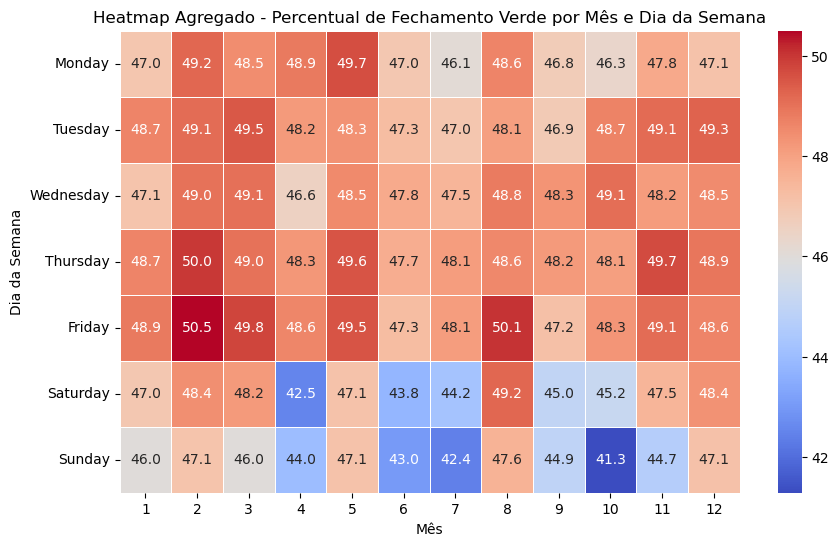

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap 1: Agregado (sem separar por ano)
resumo_agregado = df_combined_min.groupby(['symbol', 'mes', 'dia_da_semana'])['green'].mean().reset_index()
resumo_agregado['green_percentage'] = resumo_agregado['green'] * 100

# Criando a tabela pivô para o heatmap agregado
pivot_agregado = resumo_agregado.pivot(index='dia_da_semana', columns='mes', values='green_percentage')

# Ordenar os dias da semana
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_agregado = pivot_agregado.reindex(ordem_dias)

# Criando o heatmap agregado
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_agregado, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Heatmap Agregado - Percentual de Fechamento Verde por Mês e Dia da Semana")
plt.xlabel("Mês")
plt.ylabel("Dia da Semana")
plt.show()

#### Separado por ano

In [18]:
resumo = df_combined_min.groupby(['symbol', 'ano', 'mes', 'dia_da_semana'])['green'].mean().reset_index()
resumo['green_percentage'] = resumo['green'] * 100 

# Ordenar os dias da semana
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
resumo['dia_da_semana'] = pd.Categorical(resumo['dia_da_semana'], categories=ordem_dias, ordered=True)
resumo.sort_values(['symbol', 'ano', 'mes', 'dia_da_semana'], inplace=True)

# Imprimir mensagem para cada grupo, incluindo o ano
for _, row in resumo.iterrows():
    symbol = row['symbol']
    ano = row['ano']
    mes = row['mes']
    dia = row['dia_da_semana']  # Mantendo em inglês
    green_pct = row['green_percentage']
    print(f"In {ano}, on {dia}s in month {mes}, the asset {symbol} closed green {green_pct:.2f}% of the time.")


In 2020, on Mondays in month 1, the asset BTC/USD closed green 47.08% of the time.
In 2020, on Tuesdays in month 1, the asset BTC/USD closed green 50.12% of the time.
In 2020, on Wednesdays in month 1, the asset BTC/USD closed green 47.02% of the time.
In 2020, on Thursdays in month 1, the asset BTC/USD closed green 47.61% of the time.
In 2020, on Fridays in month 1, the asset BTC/USD closed green 48.57% of the time.
In 2020, on Saturdays in month 1, the asset BTC/USD closed green 43.94% of the time.
In 2020, on Sundays in month 1, the asset BTC/USD closed green 43.51% of the time.
In 2020, on Mondays in month 2, the asset BTC/USD closed green 49.06% of the time.
In 2020, on Tuesdays in month 2, the asset BTC/USD closed green 48.14% of the time.
In 2020, on Wednesdays in month 2, the asset BTC/USD closed green 47.99% of the time.
In 2020, on Thursdays in month 2, the asset BTC/USD closed green 51.56% of the time.
In 2020, on Fridays in month 2, the asset BTC/USD closed green 51.81% of 

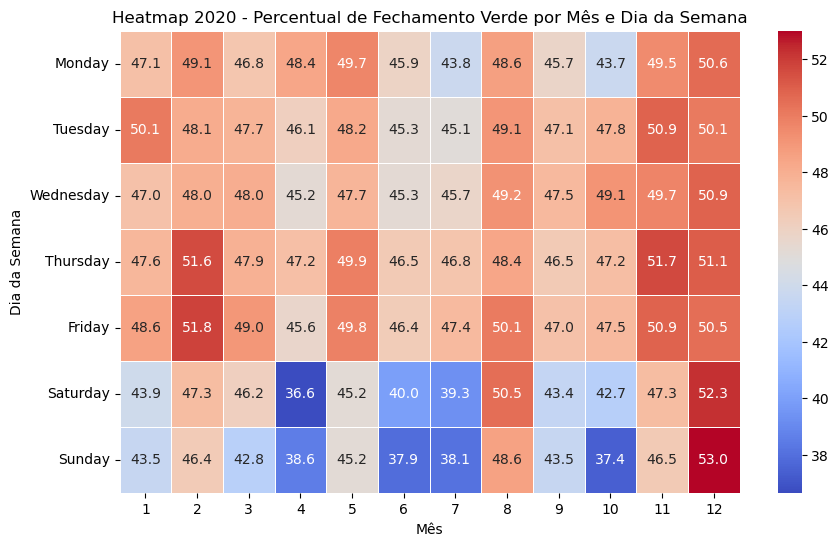

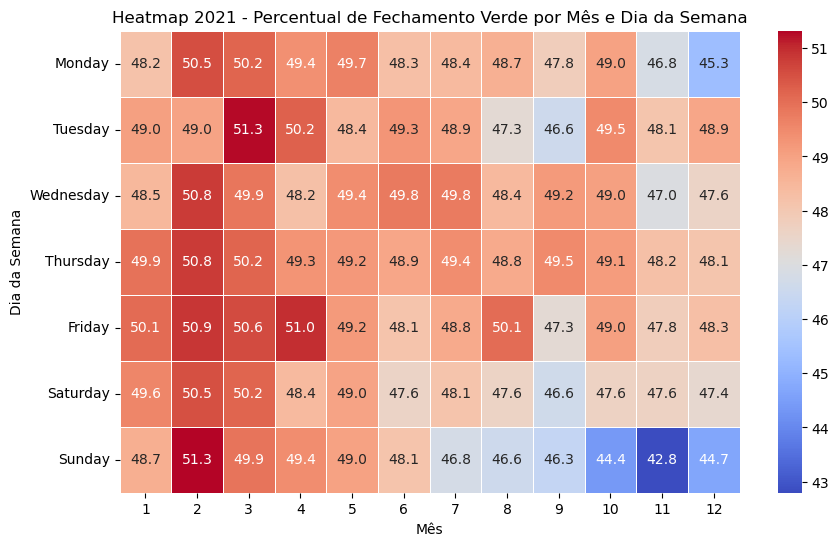

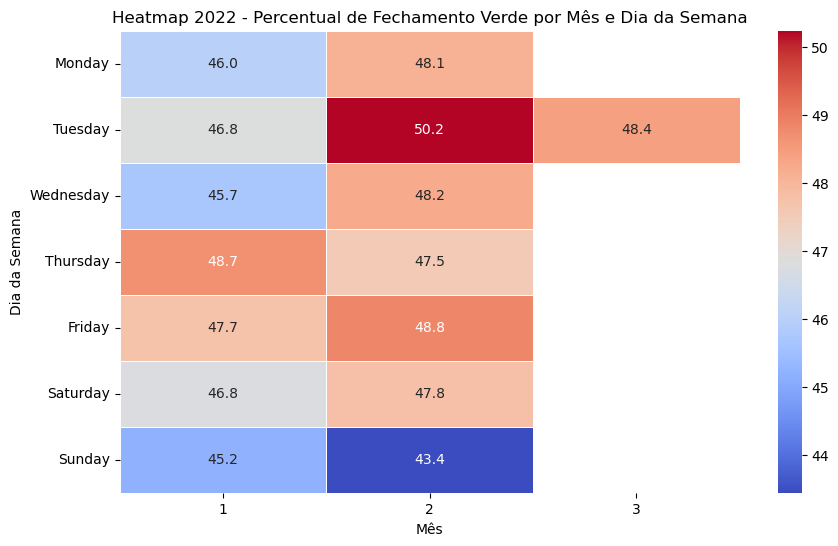

In [19]:
# Heatmap 2: Separado por Ano
resumo_ano = df_combined_min.groupby(['symbol', 'ano', 'mes', 'dia_da_semana'])['green'].mean().reset_index()
resumo_ano['green_percentage'] = resumo_ano['green'] * 100

# Criando heatmaps separados por ano
for ano in resumo_ano['ano'].unique():
    df_ano = resumo_ano[resumo_ano['ano'] == ano]
    pivot_ano = df_ano.pivot(index='dia_da_semana', columns='mes', values='green_percentage')
    pivot_ano = pivot_ano.reindex(ordem_dias)  

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_ano, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
    plt.title(f"Heatmap {ano} - Percentual de Fechamento Verde por Mês e Dia da Semana")
    plt.xlabel("Mês")
    plt.ylabel("Dia da Semana")
    plt.show()

In [20]:
# Criar uma coluna indicando se o dia foi negativo
df_combined_min['negative'] = df_combined_min['daily_return'] < 0

# Agrupar por ano e mês, verificando se todos os dias foram negativos
resultado = df_combined_min.groupby(['ano', 'mes'])['negative'].all().reset_index()

# Filtrar apenas os meses que foram negativos o mês inteiro
meses_negativos = resultado[resultado['negative'] == True]

# Exibir os meses que foram totalmente negativos
if not meses_negativos.empty:
    for _, row in meses_negativos.iterrows():
        print(f"Em {row['ano']}, o mês {row['mes']} foi totalmente negativo.")
else:
    print("Nenhum mês teve todos os dias fechando negativo.")


Nenhum mês teve todos os dias fechando negativo.


In [21]:
# Criar uma coluna para indicar se o candle abriu verde (abertura maior que fechamento anterior)
df_combined_min['open_green'] = df_combined_min['open'] > df_combined_min['close'].shift(1)

# Criar uma coluna para indicar se o candle fechou verde (fechamento maior que abertura)
df_combined_min['close_green'] = df_combined_min['close'] > df_combined_min['open']

# Contar os casos em que abriu verde e fechou verde
total_open_green = df_combined_min['open_green'].sum()
total_both_green = ((df_combined_min['open_green']) & (df_combined_min['close_green'])).sum()

# Calcular a porcentagem
if total_open_green > 0:
    pct_both_green = (total_both_green / total_open_green) * 100
    print(f"Quando abriu verde, fechou verde em {pct_both_green:.2f}% das vezes.")
else:
    print("Não há casos suficientes para análise.")


Quando abriu verde, fechou verde em 26.68% das vezes.


# Exploração por dia

In [22]:
# Converter 'date' para extrair apenas a parte da data
df_combined_daily['date_only'] = df_combined_daily['date'].dt.date

In [23]:
df_daily = df_combined_daily.groupby(
    ['symbol', df_combined_daily['date'].dt.date]
).agg(
    open=('open', 'first'),
    high=('high', 'max'),
    low=('low', 'min'),
    close=('close', 'last'),
    volume_btc=('volume_btc', 'sum'),
    volume_usd=('volume_usd', 'sum'),
    date_reference=('date', 'first')  # Define já o nome desejado
).reset_index()


In [24]:
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Calcular o retorno diário usando os candles diários:
df_daily['daily_return'] = (df_daily['close'] - df_daily['open']) / df_daily['open']

# Criar a coluna 'green' que indica se o dia fechou positivo:
df_daily['green'] = df_daily['daily_return'] > 0

# Adicionar informações de mês e dia da semana:
df_daily['mes'] = df_daily['date'].dt.month
df_daily['dia_da_semana'] = df_daily['date'].dt.day_name()

# 1. Análise de segundas-feiras:
segundas = df_daily[df_daily['dia_da_semana'] == 'Monday']
percent_verde_seg = segundas['green'].mean() * 100
print(f"Segundas-feiras fecharam positivas em {percent_verde_seg:.2f}% dos casos.")

Segundas-feiras fecharam positivas em 45.45% dos casos.


In [25]:
df_daily.head(30)

,symbol,date,open,high,low,close,volume_btc,volume_usd,date_reference,daily_return,green,mes,dia_da_semana
0,BTC/USD,2020-01-01,7178.68,7237.35,7150.00,7161.20,1113.608002,8.012433e+06,2020-01-01 23:59:00,-0.002435,False,1,Wednesday
1,BTC/USD,2020-01-02,6943.91,7184.94,6900.00,7176.23,3972.707954,2.792437e+07,2020-01-02 23:59:00,0.033457,True,1,Thursday
2,BTC/USD,2020-01-03,7316.07,7402.31,6853.53,6946.56,8072.729087,5.837277e+07,2020-01-03 23:59:00,-0.050507,False,1,Friday
3,BTC/USD,2020-01-04,7350.68,7396.10,7256.03,7333.47,3256.737353,2.382446e+07,2020-01-04 23:59:00,-0.002341,False,1,Saturday
4,BTC/USD,2020-01-05,7351.86,7495.00,7310.00,7356.05,2707.273855,2.010650e+07,2020-01-05 23:59:00,0.000570,True,1,Sunday
5,BTC/USD,2020-01-06,7761.64,7817.00,7342.46,7347.52,6728.282778,5.113535e+07,2020-01-06 23:59:00,-0.053355,False,1,Monday
6,BTC/USD,2020-01-07,8172.81,8220.00,7697.03,7780.17,12158.322812,9.636378e+07,2020-01-07 23:59:00,-0.048042,False,1,Tuesday
7,BTC/USD,2020-01-08,8039.31,8463.57,7872.09,8172.27,11913.232482,9.792579e+07,2020-01-08 23:59:00,0.016539,True,1,Wednesday
8,BTC/USD,2020-01-09,7811.59,8048.94,7737.97,8031.55,5957.244240,4.701738e+07,2020-01-09 23:59:00,0.028158,True,1,Thursday
9,BTC/USD,2020-01-10,8191.14,8200.00,7667.00,7807.99,8999.988257,7.150221e+07,2020-01-10 23:59:00,-0.046776,False,1,Friday


In [27]:
df_combined_min.head()

,unix,date,symbol,open,high,low,close,volume_btc,volume_usd,unix_date,ano,mes,dia,dia_semana,daily_return,green,dia_da_semana,negative,open_green,close_green
0,1609459140,2020-12-31 23:59:00,BTC/USD,28982.44,29024.59,28969.83,28992.79,5.897679,170990.182941,2020-12-31 23:59:00,2020,12,31,3,0.000357,True,Thursday,False,False,True
1,1609459080,2020-12-31 23:58:00,BTC/USD,29044.79,29048.62,29000.12,29000.12,20.362289,590508.837815,2020-12-31 23:58:00,2020,12,31,3,-0.001538,False,Thursday,True,True,False
2,1609459020,2020-12-31 23:57:00,BTC/USD,29039.53,29048.63,29023.26,29044.79,14.503728,421257.721488,2020-12-31 23:57:00,2020,12,31,3,0.000181,True,Thursday,False,True,True
3,1609458960,2020-12-31 23:56:00,BTC/USD,29052.02,29059.42,29039.28,29039.53,2.707583,78626.925850,2020-12-31 23:56:00,2020,12,31,3,-0.000430,False,Thursday,True,True,False
4,1609458900,2020-12-31 23:55:00,BTC/USD,29036.10,29052.02,29025.78,29052.02,7.631439,221708.705383,2020-12-31 23:55:00,2020,12,31,3,0.000548,True,Thursday,False,False,True


In [ ]:
# 2. Cálculo do fechamento anterior e se abre verde:
# Ordenar corretamente os dados:
df_daily = df_daily.sort_values(['symbol', 'date'])
df_daily['fechamento_anterior'] = df_daily.groupby('symbol')['close'].shift(1)

# Definir se a abertura do dia foi "verde" (maior que o fechamento do dia anterior):
df_daily['abertura_verde'] = df_daily['open'] > df_daily['fechamento_anterior']

# Remover os primeiros dias (que não possuem fechamento anterior)
df_daily_clean = df_daily.dropna(subset=['fechamento_anterior'])

# Calcular a probabilidade de que, quando o dia abre verde, ele também feche verde:
dias_abertura_verde = df_daily_clean[df_daily_clean['abertura_verde']]
percent_fecha_verde = dias_abertura_verde['green'].mean() * 100
print(f"Quando abre verde, fecha verde {percent_fecha_verde:.2f}% das vezes.")

Quando abre verde, fecha verde 27.97% das vezes.


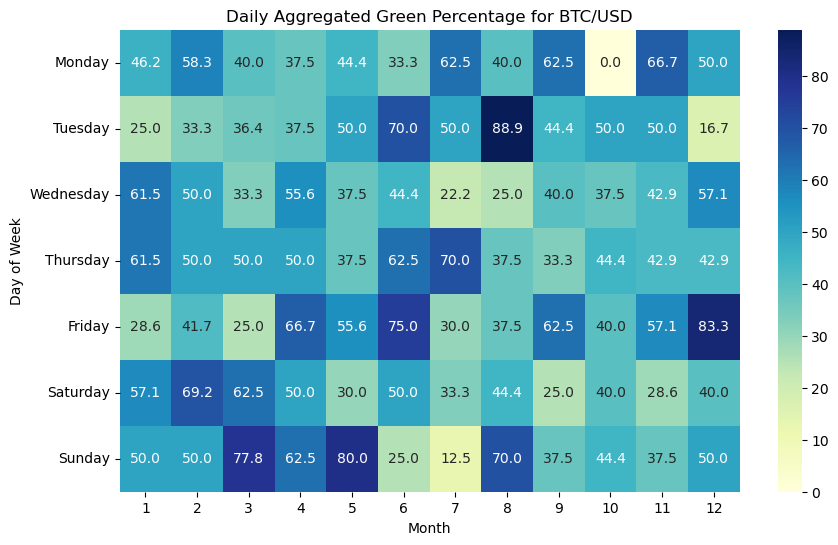

In [26]:
# 3. Visualização com Heatmap para um ativo específico:
import seaborn as sns
import matplotlib.pyplot as plt

asset = 'BTC/USD'
df_asset_daily = df_daily[df_daily['symbol'] == asset]

# Agrupar por mês e dia da semana e calcular a média dos dias "green":
resumo_daily = df_asset_daily.groupby(['mes', 'dia_da_semana'])['green'].mean().reset_index()
resumo_daily['green_percentage'] = resumo_daily['green'] * 100

# Criar uma tabela pivô: linhas = dia da semana, colunas = mês, valores = green_percentage:
pivot_table = resumo_daily.pivot(index="dia_da_semana", columns="mes", values="green_percentage")

# Definir a ordem dos dias da semana para visualização (segunda a domingo):
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordem_dias)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title(f"Daily Aggregated Green Percentage for {asset}")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()




## Testes Estatisticos

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Exemplo para a coluna 'daily_return' do BTC/USD
serie = df_daily[df_daily['symbol'] == 'BTC/USD']['daily_return'].dropna()

# Teste ADF
resultado_adf = adfuller(serie)
print(f"ADF Statistic: {resultado_adf[0]}")
print(f"p-value: {resultado_adf[1]}")  # p < 0.05 sugere estacionariedade

# Teste KPSS
resultado_kpss = kpss(serie)
print(f"KPSS Statistic: {resultado_kpss[0]}")
print(f"p-value: {resultado_kpss[1]}")  # p < 0.05 sugere não-estacionariedade

ADF Statistic: -12.440719352075066
p-value: 3.758760226394536e-23
KPSS Statistic: 0.12359782694141162
p-value: 0.1


C:\Users\Luiz\AppData\Local\Temp\ipykernel_20588\4100047877.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie)


Interpretação:
Hipótese nula (H₀): A série não é estacionária (possui raiz unitária).
Hipótese alternativa (H₁): A série é estacionária .
O p-value extremamente baixo (<< 0.05) permite rejeitar H₀ , ou seja, a série é estacionária . Isso sugere que a média e a variância dos retornos diários (daily_return) são relativamente constantes ao longo do tempo.

Interpretação:
Hipótese nula (H₀): A série é estacionária (tendência determinística).
Hipótese alternativa (H₁): A série não é estacionária (tendência estocástica).
O p-value de 0.1 é maior que 0.05, então não rejeitamos H₀ . Isso sugere que a série é estacionária ao redor de uma tendência determinística (ex: uma tendência linear).

Conflito com ADF?
ADF rejeita não-estacionariedade, KPSS não rejeita estacionariedade.
Isso pode indicar que a série é trend-stationary (estacionária após remover uma tendência determinística).
Ação: Verifique visualmente a série para identificar tendências ou sazonalidades

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Teste de Ljung-Box para autocorrelação
lb_test = acorr_ljungbox(serie, lags=[10], return_df=True)
print(lb_test)
# p-value < 0.05 indica autocorrelação significativa

     lb_stat  lb_pvalue
10  30.94478   0.000599


In [ ]:
from scipy.stats import shapiro, jarque_bera

# Shapiro-Wilk
stat_sw, p_sw = shapiro(serie)
print(f"Shapiro p-value: {p_sw}")  # p < 0.05 rejeita normalidade

# Jarque-Bera
stat_jb, p_jb = jarque_bera(serie)
print(f"Jarque-Bera p-value: {p_jb}")  # p < 0.05 rejeita normalidade

Shapiro p-value: 7.832899193391776e-30
Jarque-Bera p-value: 0.0


## Series temporais:

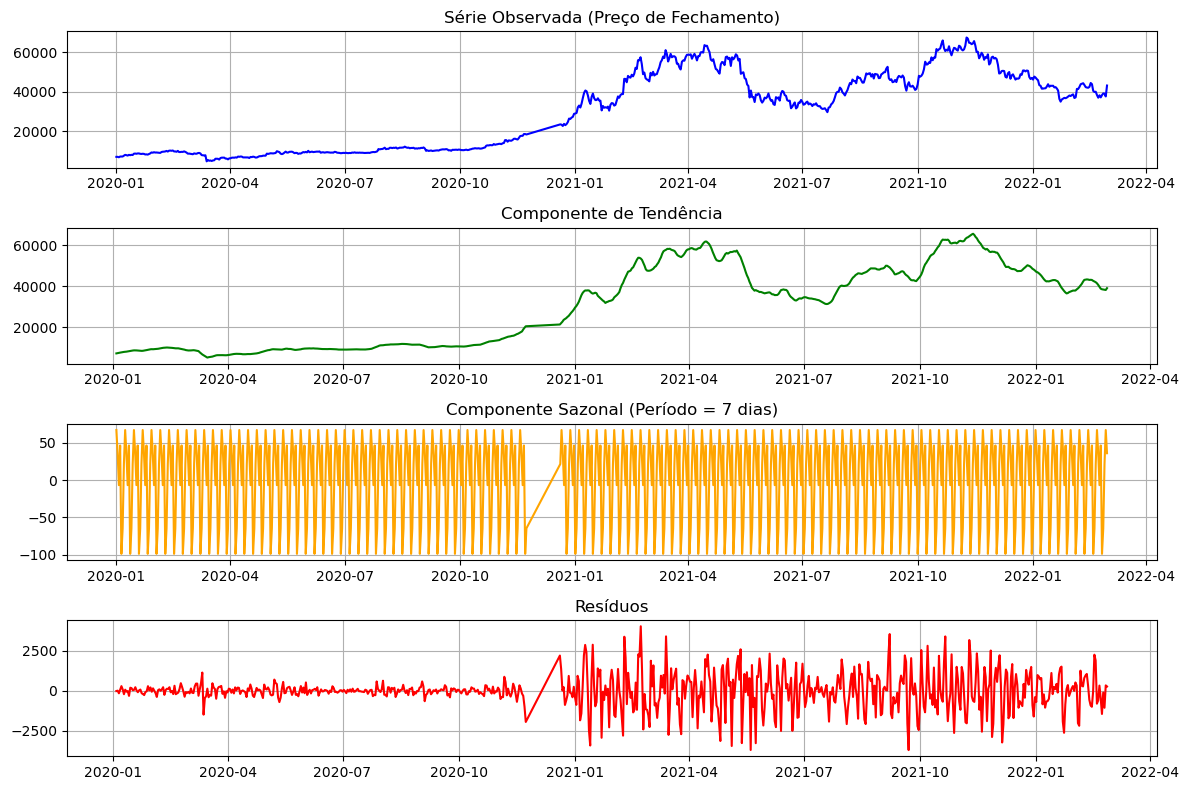

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtrar dados do BTC/USD
serie_temporal = df_daily[df_daily['symbol'] == 'BTC/USD'].set_index('date')['close']

# Decomposição aditiva
decomposicao = seasonal_decompose(serie_temporal, model='additive', period=7)

# Criar subplots para melhor organização
plt.figure(figsize=(12, 8))

# Plotar componente observado
plt.subplot(4, 1, 1)
plt.plot(decomposicao.observed, label='Observado', color='blue')
plt.title('Série Observada (Preço de Fechamento)')
plt.grid(True)

# Plotar tendência
plt.subplot(4, 1, 2)
plt.plot(decomposicao.trend, label='Tendência', color='green')
plt.title('Componente de Tendência')
plt.grid(True)

# Plotar sazonalidade
plt.subplot(4, 1, 3)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='orange')
plt.title('Componente Sazonal (Período = 7 dias)')
plt.grid(True)

# Plotar resíduos
plt.subplot(4, 1, 4)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.title('Resíduos')
plt.grid(True)

plt.tight_layout()
plt.show()


fig = go.Figure()
fig.add_trace(go.Scatter(x=decomposicao.observed.index, y=decomposicao.observed, name='Observado'))
fig.add_trace(go.Scatter(x=decomposicao.trend.index, y=decomposicao.trend, name='Tendência'))
fig.add_trace(go.Scatter(x=decomposicao.seasonal.index, y=decomposicao.seasonal, name='Sazonalidade'))
fig.add_trace(go.Scatter(x=decomposicao.resid.index, y=decomposicao.resid, name='Resíduos'))
fig.update_layout(title='Decomposição da Série Temporal do BTC/USD', xaxis_title='Data', yaxis_title='Preço')
fig.show()

c:\Users\Luiz\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001744. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




Iteration:      1,   Func. Count:      6,   Neg. LLF: 905384.1188937532
Iteration:      2,   Func. Count:     17,   Neg. LLF: -393.91330705205246
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1299.5935307452442
Iteration:      4,   Func. Count:     29,   Neg. LLF: 40865.59670947558
Iteration:      5,   Func. Count:     35,   Neg. LLF: -1304.3376550574876
Iteration:      6,   Func. Count:     41,   Neg. LLF: 48746.138774346684
Iteration:      7,   Func. Count:     47,   Neg. LLF: -1290.4113487056154
Iteration:      8,   Func. Count:     53,   Neg. LLF: -1337.8262306228066
Iteration:      9,   Func. Count:     59,   Neg. LLF: 154.74769059788446
Iteration:     10,   Func. Count:     67,   Neg. LLF: -1354.7608650750872
Iteration:     11,   Func. Count:     73,   Neg. LLF: -1355.1347822763582
Iteration:     12,   Func. Count:     78,   Neg. LLF: -1355.135024573416
Iteration:     13,   Func. Count:     83,   Neg. LLF: -1355.1350170541164
Optimization terminated successfully    (Exit

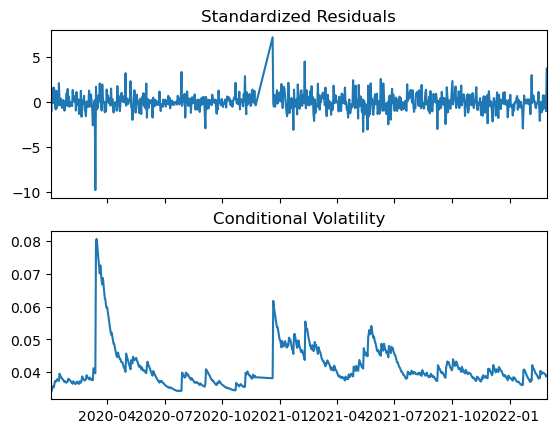

In [ ]:
from arch import arch_model

# Ajustar GARCH(1,1)
modelo_garch = arch_model(serie_temporal.pct_change().dropna(), vol='Garch', p=1, q=1)
resultados_garch = modelo_garch.fit()
print(resultados_garch.summary())

# Plotar volatilidade condicional
fig = resultados_garch.plot()

Interpretação do Modelo GARCH
Seus resultados do GARCH(1,1) mostram:

Coeficientes:
omega (0.0785): Variância de longo prazo.
alpha[1] (0.0785): Impacto de choques recentes na volatilidade (0.0785 = 7.85% de impacto).
beta[1] (0.9178): Persistência da volatilidade (alta persistência: 0.9178 = 91.78%).
Diagnostics:
Log-Likelihood: 1355.14 (modelo adequado).
AIC/BIC: -2702.27 e -2683.72 (quanto menor, melhor).
Heterocedasticidade: Ainda presente (H = 21.45), mas o GARCH captura parte dela.
Conclusão:
O modelo GARCH(1,1) é adequado para capturar a volatilidade do BTC/USD.
A persistência alta (beta) sugere que choques na volatilidade têm efeito duradouro

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar SARIMA(1,1,1)(1,0,0,7)
modelo_sarima = SARIMAX(serie_temporal, order=(1,1,1), seasonal_order=(1,0,0,7))
resultados_sarima = modelo_sarima.fit()
print(resultados_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  765
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 7)   Log Likelihood               -6631.612
Date:                            qua, 26 fev 2025   AIC                          13271.224
Time:                                    10:42:46   BIC                          13289.778
Sample:                                         0   HQIC                         13278.367
                                            - 765                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0952      0.737      0.129      0.897      -1.350       1.540
ma.L1         -0.1334      0.734   

c:\Users\Luiz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Luiz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
from cmdstanpy import CmdStanModel, install_cmdstan
import os

# Defina o caminho para o CmdStan (evite espaços no caminho)
os.environ["CMDSTAN"] = "C:/cmdstan"

# Instale o CmdStan (execute apenas uma vez)
install_cmdstan(compiler=False, cores=4)

CmdStan install directory: C:\Users\Luiz\.cmdstan
Installing CmdStan version: 2.36.0
Download successful, file: C:\Users\Luiz\AppData\Local\Temp\tmp_6k_j81s
Extracting distribution


10:53:45 - cmdstanpy - WARNING - CmdStan installation failed.
Command "make build" failed
Command: ['mingw32-make', 'build', '-j4']
failed with error [WinError 2] O sistema não pode encontrar o arquivo especificado



Unpacked download as cmdstan-2.36.0
Building version cmdstan-2.36.0, may take several minutes, depending on your system.


False

In [ ]:
# Filtrar dados do BTC/USD
df_prophet = df_daily[df_daily['symbol'] == 'BTC/USD'][['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
print(df_prophet.head())

          ds        y
0 2020-01-01  7161.20
1 2020-01-02  7176.23
2 2020-01-03  6946.56
3 2020-01-04  7333.47
4 2020-01-05  7356.05


In [ ]:
import os
from prophet import Prophet
from cmdstanpy import CmdStanModel

# Configurar caminho do CmdStan
os.environ["CMDSTAN"] = "C:/Users/Luiz/.cmdstan"  # Substitua pelo seu caminho

# Filtrar dados do BTC/USD
df_prophet = df_daily[df_daily['symbol'] == 'BTC/USD'][['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Verificar dados
print("Amostra de df_prophet:")
print(df_prophet.head())

# Inicializar e treinar o modelo
try:
    modelo = Prophet(stan_backend='CMDSTANPY')
    modelo.fit(df_prophet)
except Exception as e:
    print(f"Erro: {e}")
    raise

# Previsão
futuro = modelo.make_future_dataframe(periods=30)
previsao = modelo.predict(futuro)

# Visualização
fig = modelo.plot(previsao)
plt.title("Previsão de Preço do BTC/USD")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.show()

Amostra de df_prophet:
          ds        y
0 2020-01-01  7161.20
1 2020-01-02  7176.23
2 2020-01-03  6946.56
3 2020-01-04  7333.47
4 2020-01-05  7356.05
Erro: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

## Kmeans: 

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   symbol               765 non-null    object        
 1   date                 765 non-null    datetime64[ns]
 2   open                 765 non-null    float64       
 3   high                 765 non-null    float64       
 4   low                  765 non-null    float64       
 5   close                765 non-null    float64       
 6   volume_btc           765 non-null    float64       
 7   volume_usd           765 non-null    float64       
 8   date_reference       765 non-null    datetime64[ns]
 9   daily_return         765 non-null    float64       
 10  green                765 non-null    bool          
 11  mes                  765 non-null    int32         
 12  dia_da_semana        765 non-null    object        
 13  fechamento_anterior  764 non-null  

In [ ]:
# Converter dia da semana para número (0=Segunda, 6=Domingo)
df_daily['dia_da_semana_num'] = df_daily['date'].dt.weekday

In [ ]:
df_daily['volatilidade'] = df_daily['high'] - df_daily['low']

In [ ]:
# Mapear nomes dos dias para números
dias = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_daily['dia_da_semana_num'] = df_daily['dia_da_semana'].map(dias)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecionar features
features = df_daily[['daily_return', 'volatilidade', 'volume_usd', 'dia_da_semana_num']]

# Normalizar (importante para clusterização)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

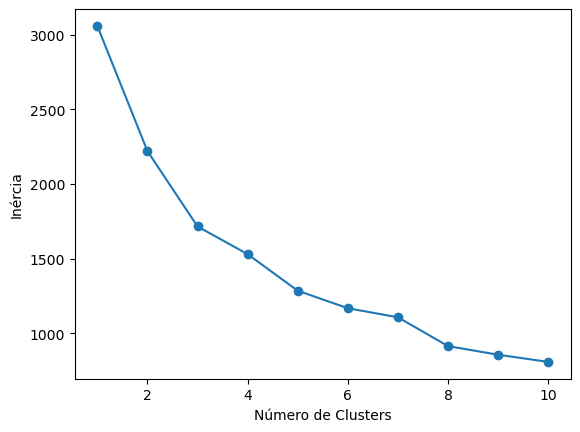

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar número ótimo de clusters (método do cotovelo)
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Aplicar K-Means com k escolhido (ex: k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_daily['cluster'] = kmeans.fit_predict(features_scaled)

         daily_return  volatilidade    volume_usd
cluster                                          
0           -0.004920   1389.084050  1.155065e+08
1            0.013677   5072.685321  4.150384e+08
2           -0.001368   1368.027047  9.113165e+07


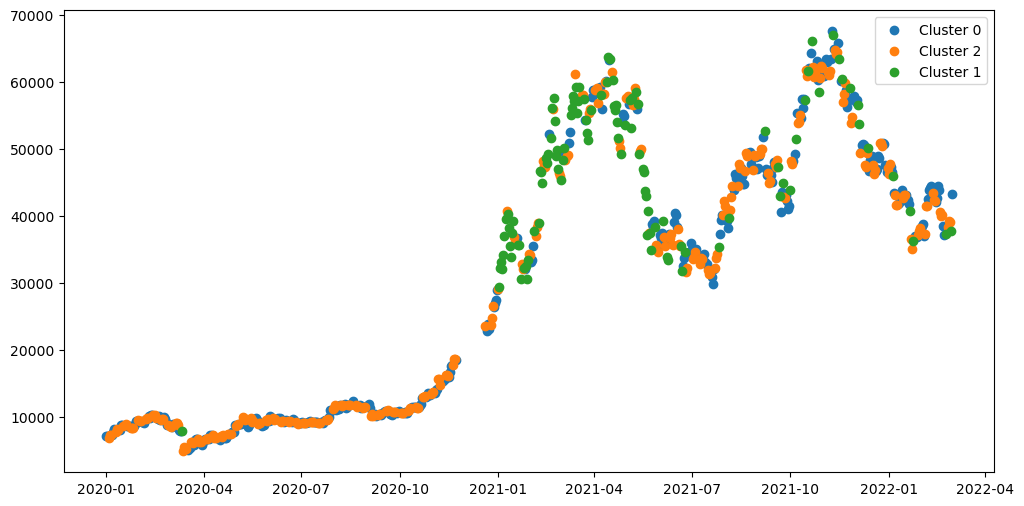

In [ ]:
# Média das features por cluster
cluster_summary = df_daily.groupby('cluster')[['daily_return', 'volatilidade', 'volume_usd']].mean()
print(cluster_summary)

# Visualizar clusters no tempo
plt.figure(figsize=(12, 6))
for cluster in df_daily['cluster'].unique():
    subset = df_daily[df_daily['cluster'] == cluster]
    plt.scatter(subset['date'], subset['close'], label=f'Cluster {cluster}')
plt.legend()
plt.show()

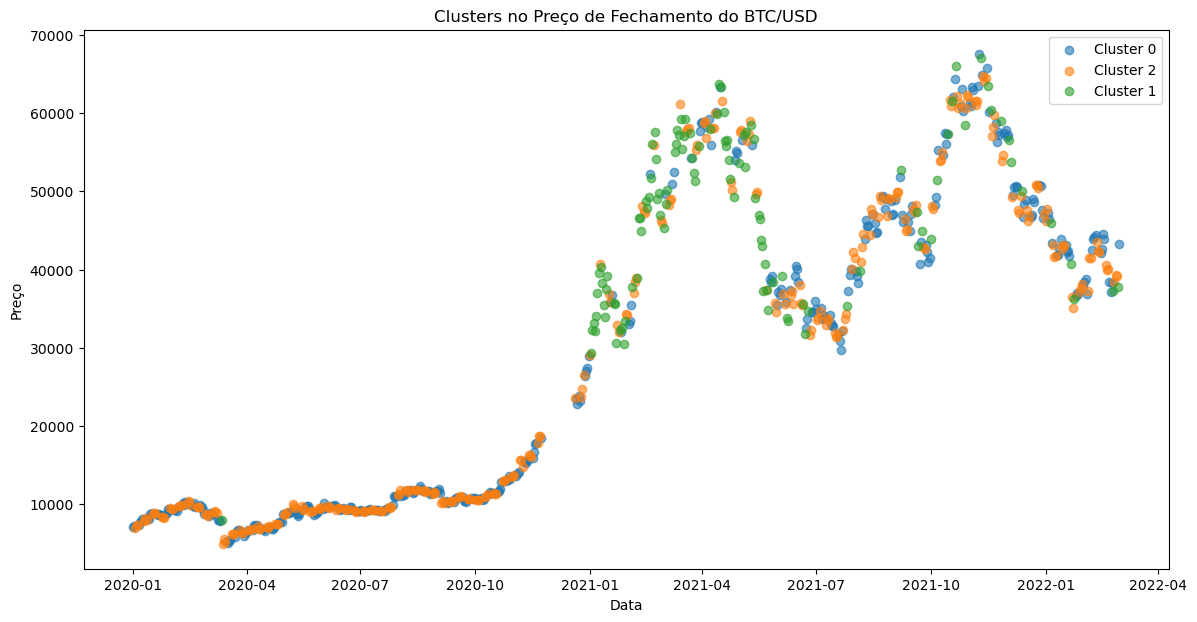

In [ ]:
plt.figure(figsize=(14, 7))
for cluster in df_daily['cluster'].unique():
    subset = df_daily[df_daily['cluster'] == cluster]
    plt.scatter(subset['date'], subset['close'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('Clusters no Preço de Fechamento do BTC/USD')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

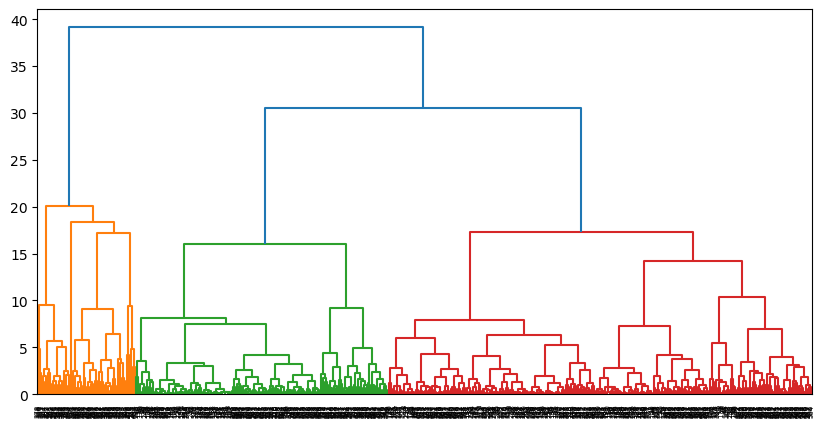

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Linkage
Z = linkage(features_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

# Treinar modelo
modelo = IsolationForest(contamination=0.05, random_state=42)
df_daily['anomalia'] = modelo.fit_predict(features_scaled)

# Filtrar anomalias
anomalias = df_daily[df_daily['anomalia'] == -1]
print(f"Dias com anomalias: {len(anomalias)}")

Dias com anomalias: 39


In [ ]:
# Filtrar anomalias
anomalias = df_daily[df_daily['anomalia'] == -1]

# Mostrar as datas e as features usadas no modelo
print("Dias com anomalias:")
print(anomalias[['date', 'daily_return', 'volatilidade', 'volume_usd', 'dia_da_semana_num']])

Dias com anomalias:
          date  daily_return  volatilidade    volume_usd  dia_da_semana_num
71  2020-03-12      0.638650       3193.31  3.601828e+08                  3
208 2020-07-27     -0.099971       1483.34  2.927895e+08                  0
341 2021-01-02     -0.087496       4283.00  5.602995e+08                  5
343 2021-01-04      0.033838       5935.76  6.980153e+08                  0
345 2021-01-06     -0.076049       3702.56  6.724257e+08                  2
346 2021-01-07     -0.062583       4074.96  8.849787e+08                  3
347 2021-01-08     -0.027254       5381.64  8.873305e+08                  4
349 2021-01-10      0.055714       7127.93  6.255241e+08                  6
350 2021-01-11      0.075500       8000.26  1.369816e+09                  0
351 2021-01-12      0.042478       4159.32  6.354236e+08                  1
354 2021-01-15      0.062531       5314.00  4.969573e+08                  4
360 2021-01-21      0.156828       5576.80  6.858952e+08            

In [ ]:
# Resumo estatístico das anomalias vs. dados normais
print("Média das anomalias:")
print(anomalias[['daily_return', 'volatilidade', 'volume_usd']].mean())

print("\nMédia dos dados normais:")
print(df_daily[df_daily['anomalia'] == 1][['daily_return', 'volatilidade', 'volume_usd']].mean())

Média das anomalias:
daily_return    3.714443e-02
volatilidade    6.433883e+03
volume_usd      5.665239e+08
dtype: float64

Média dos dados normais:
daily_return   -2.929496e-03
volatilidade    1.662487e+03
volume_usd      1.262442e+08
dtype: float64


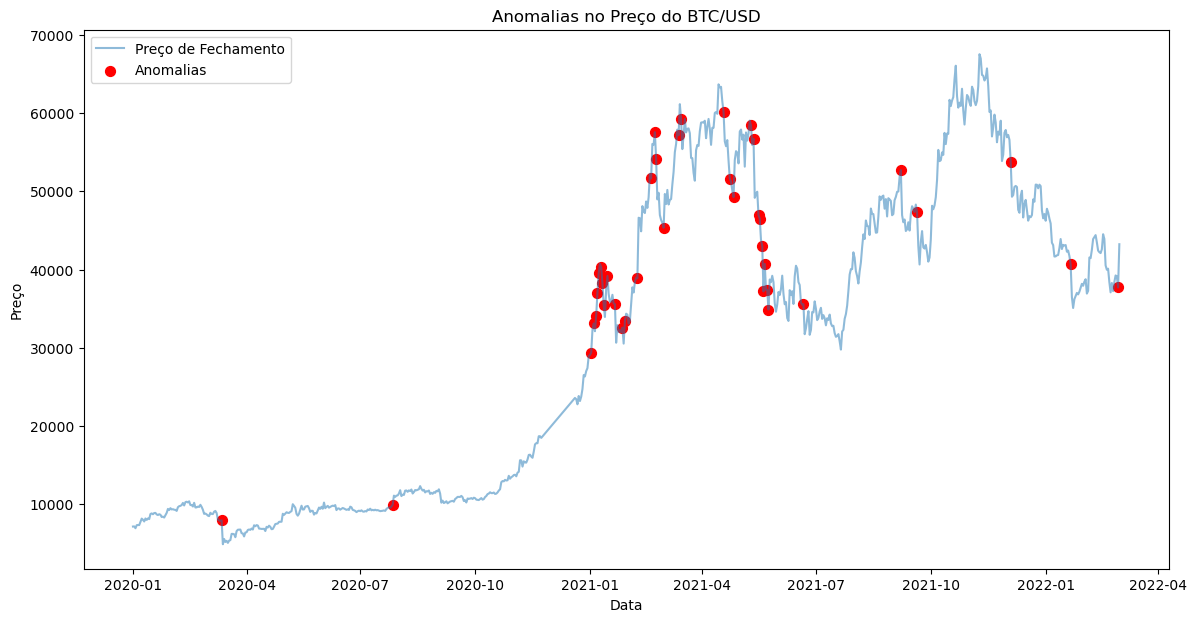

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_daily['date'], df_daily['close'], label='Preço de Fechamento', alpha=0.5)
plt.scatter(anomalias['date'], anomalias['close'], color='red', label='Anomalias', s=50)
plt.title('Anomalias no Preço do BTC/USD')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

C:\Users\Luiz\AppData\Local\Temp\ipykernel_20588\3133474072.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Luiz\AppData\Local\Temp\ipykernel_20588\3133474072.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



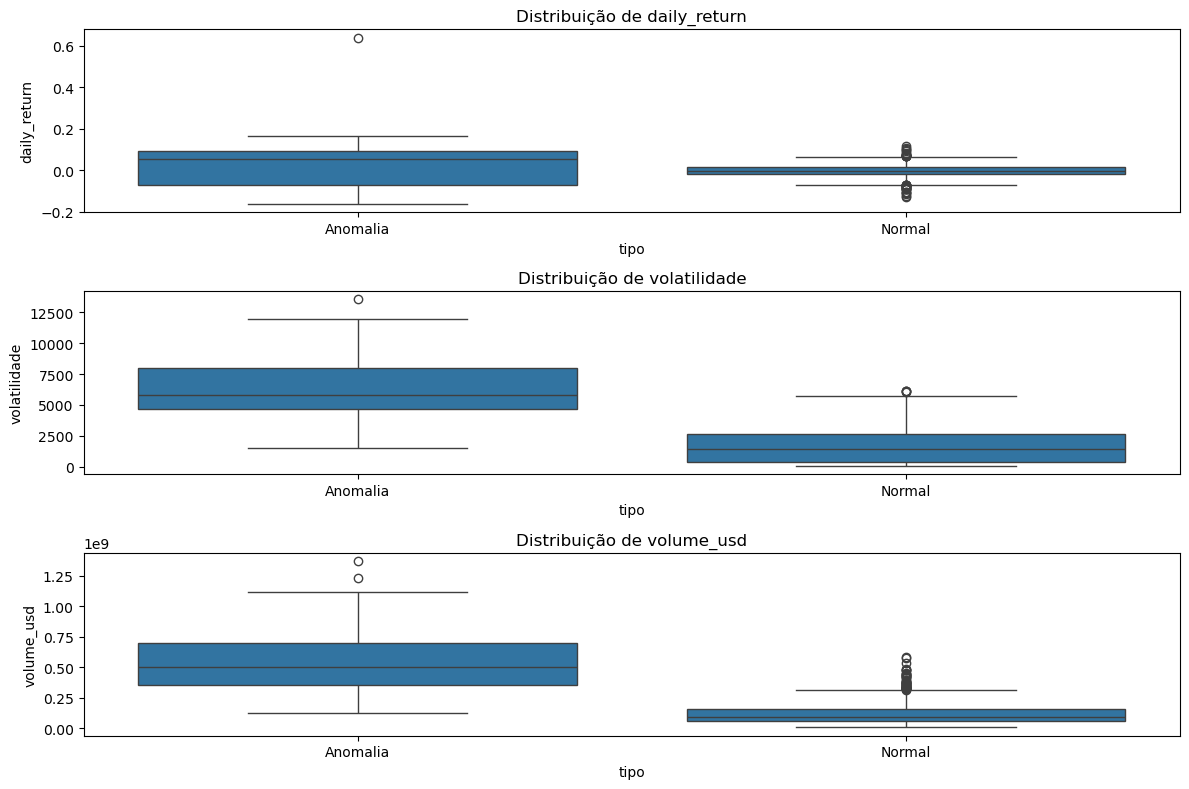

In [ ]:
import seaborn as sns

# Criar DataFrame com anomalias e dados normais
anomalias['tipo'] = 'Anomalia'
df_normal = df_daily[df_daily['anomalia'] == 1]
df_normal['tipo'] = 'Normal'
df_combined = pd.concat([anomalias, df_normal])

# Plotar boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['daily_return', 'volatilidade', 'volume_usd'], 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='tipo', y=feature, data=df_combined)
    plt.title(f'Distribuição de {feature}')
plt.tight_layout()
plt.show()

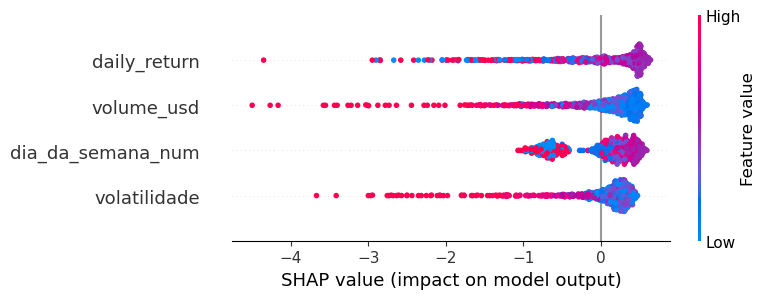

In [ ]:
# Exemplo de SHAP values (requer instalação: pip install shap)
import shap

explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(features_scaled)
shap.summary_plot(shap_values, features_scaled, feature_names=['daily_return', 'volatilidade', 'volume_usd', 'dia_da_semana_num'])